In [5]:
from google.colab import files
uploaded = files.upload()


Saving DA314_S10_EmployeeAttrition_Data_Practice.csv to DA314_S10_EmployeeAttrition_Data_Practice.csv


In [8]:
import pandas as pd

df = pd.read_csv("DA314_S10_EmployeeAttrition_Data_Practice.csv")
df.head()



,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_encoded,AgeGroup
0,1313919,41,No,Travel_Rarely,Cardiology,1,2,Life Sciences,2,Female,...,0,8,0,1,6,4,0,5,1,36-45
1,1200302,49,No,Travel_Frequently,Maternity,8,1,Life Sciences,3,Male,...,1,10,3,3,10,7,1,7,0,46-55
2,1060315,37,Yes,Travel_Rarely,Maternity,2,2,Other,4,Male,...,0,7,3,3,0,0,0,0,1,36-45
3,1272912,33,No,Travel_Frequently,Maternity,3,4,Life Sciences,4,Female,...,0,8,3,3,8,7,3,0,1,26-35
4,1414939,27,No,Travel_Rarely,Maternity,2,1,Medical,1,Male,...,1,6,3,3,2,2,2,2,0,26-35


In [9]:
df.isnull().sum()


,0
EmployeeID,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


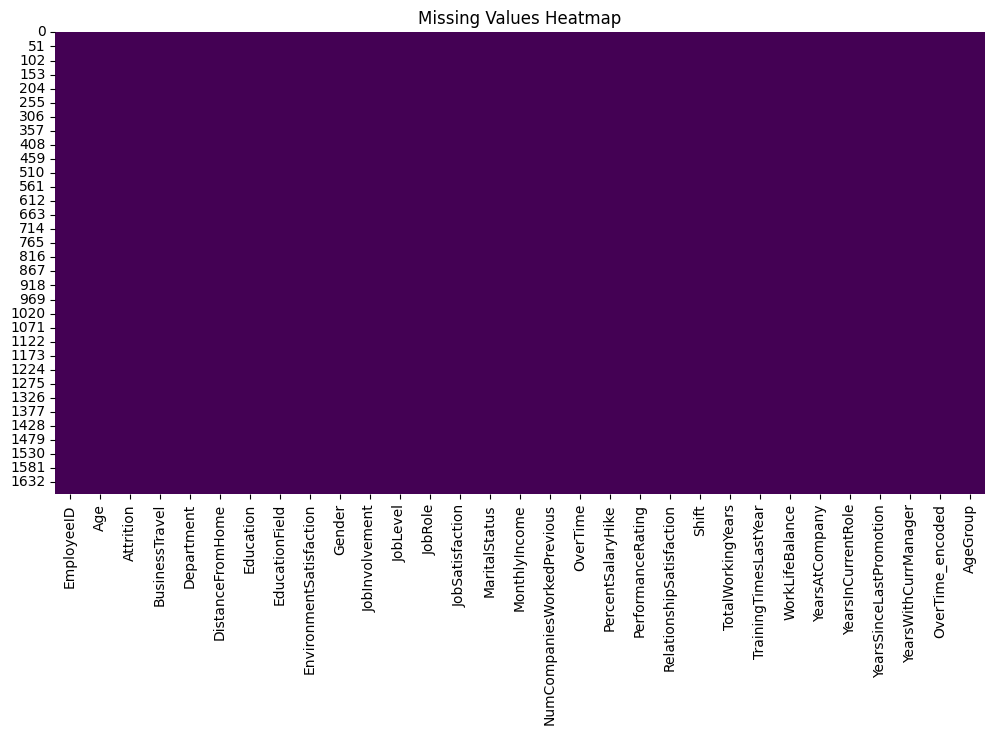

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [11]:
#prompt 2
df = df.dropna()


In [12]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [13]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [14]:
#prompt 3
df.duplicated().sum()


np.int64(0)

In [15]:

df = df.drop_duplicates()
df.shape


(1676, 31)

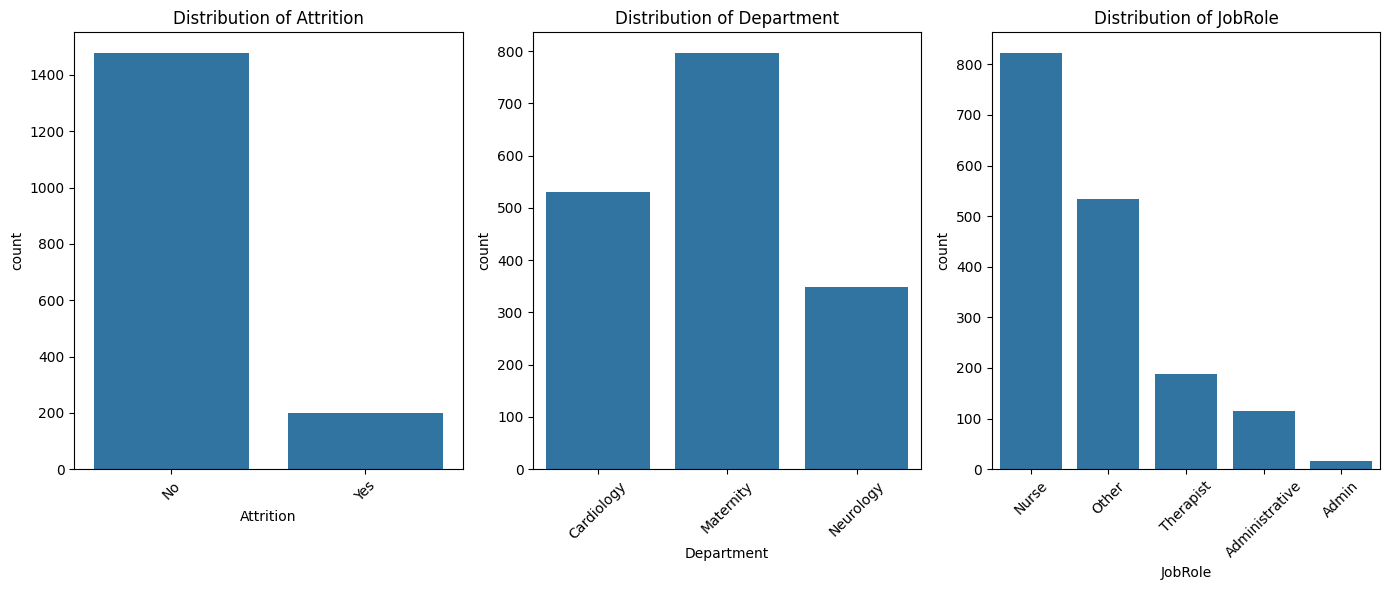

In [16]:
# prompt 4
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['Attrition', 'Department', 'JobRole']

plt.figure(figsize=(14,6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


prompt 5

1.Univariate (1 variable at a time)

What is the overall attrition rate in the company?

How are job satisfaction levels distributed among employees?

What is the distribution of overtime work?

How many years do employees typically spend with their manager?


2.Bivariate (Attrition vs another variable)

How does attrition vary across different departments?

Does overtime influence attrition?

Does MonthlyIncome affect employee attrition?

How does job level relate to attrition rate?


3.Multivariate (3+ variables together)

How do JobRole, JobSatisfaction, and Attrition relate?

How does OverTime + MonthlyIncome together impact attrition?

Does YearsAtCompany influence attrition differently by JobLevel?

Are mid-level employees with overtime more likely to leave?

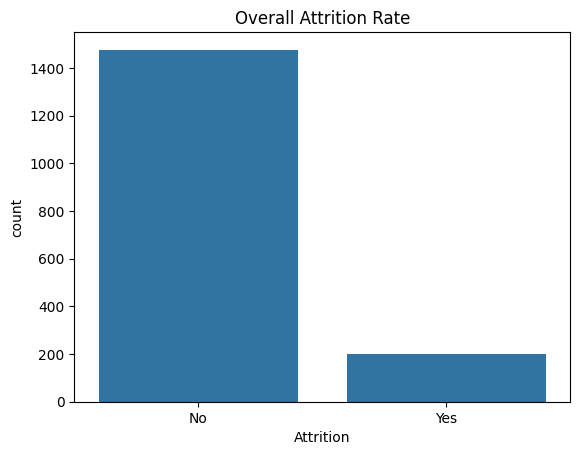

In [17]:
#prompt 6
sns.countplot(data=df, x='Attrition')
plt.title("Overall Attrition Rate")
plt.show()


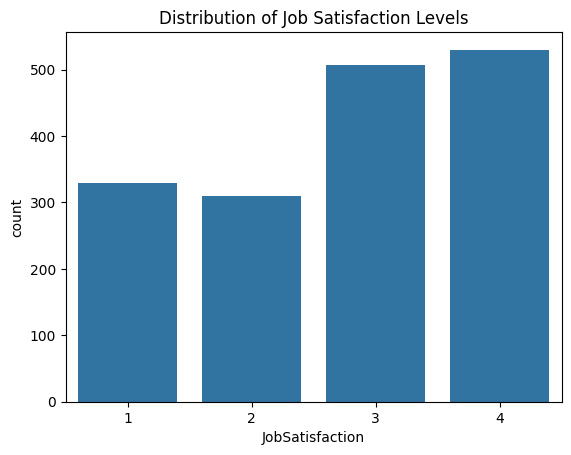

In [18]:
# prompt 7
sns.countplot(data=df, x='JobSatisfaction')
plt.title("Distribution of Job Satisfaction Levels")
plt.show()


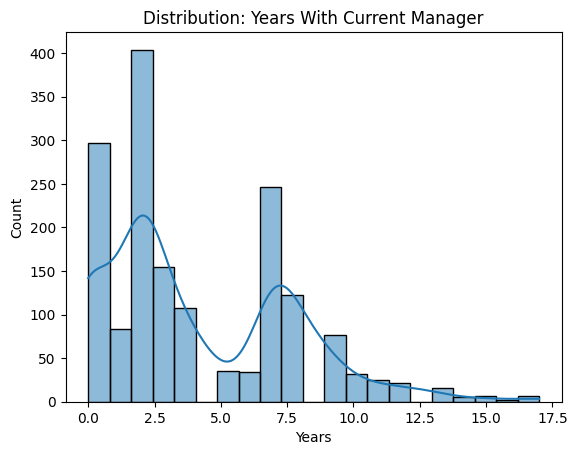

In [19]:
# prompt 8
sns.histplot(df['YearsWithCurrManager'], kde=True)
plt.title("Distribution: Years With Current Manager")
plt.xlabel("Years")
plt.show()


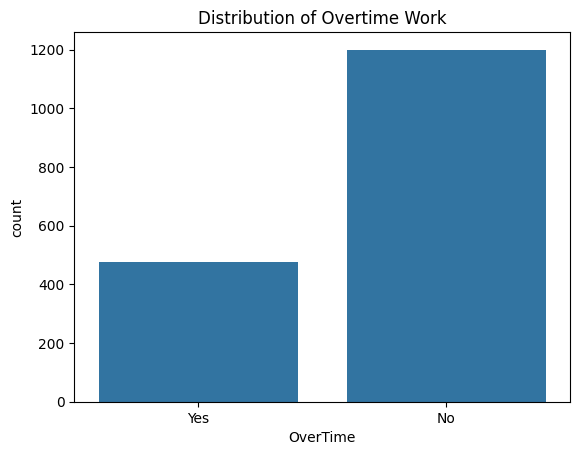

In [20]:
# prompt 9
sns.countplot(data=df, x='OverTime')
plt.title("Distribution of Overtime Work")
plt.show()


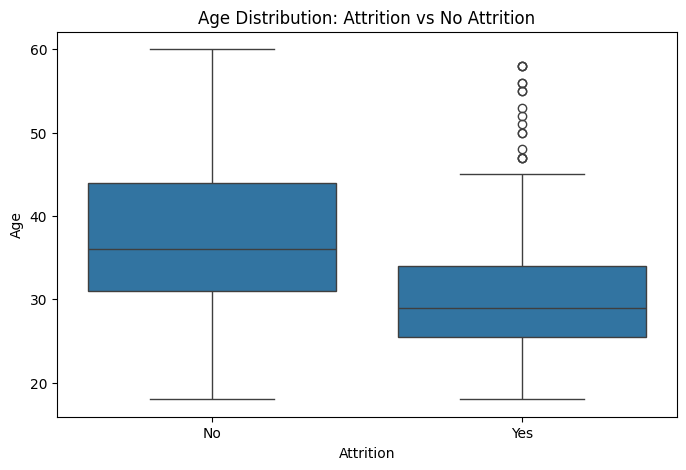

In [21]:
# prompt 10
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attrition', y='Age')
plt.title("Age Distribution: Attrition vs No Attrition")
plt.show()


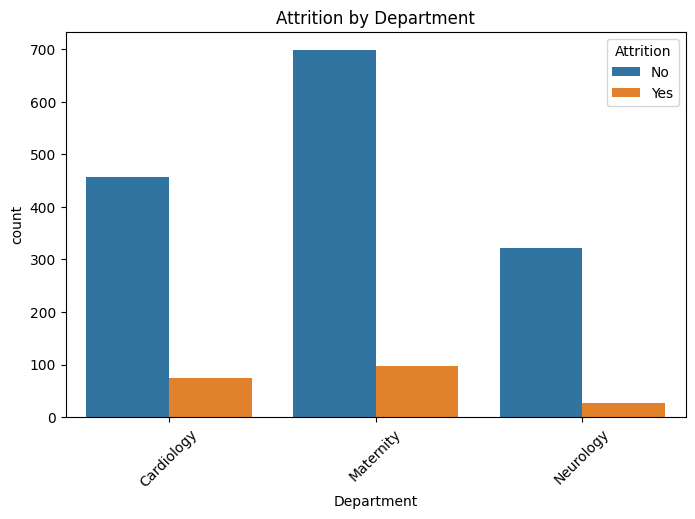

In [22]:
# prompt 11
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()


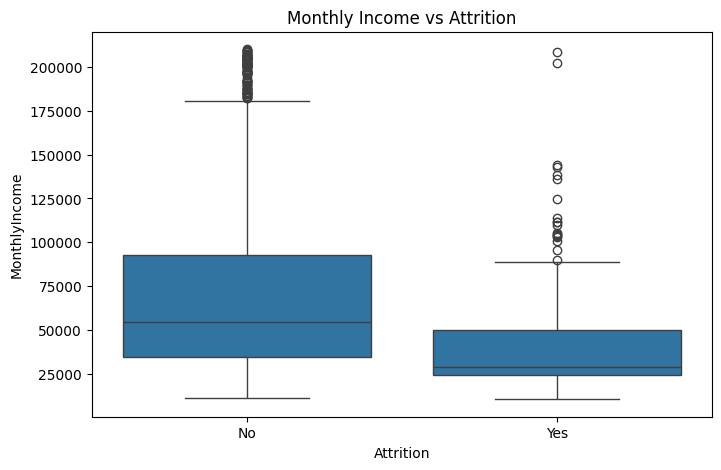

In [23]:
# propmt 12
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title("Monthly Income vs Attrition")
plt.show()


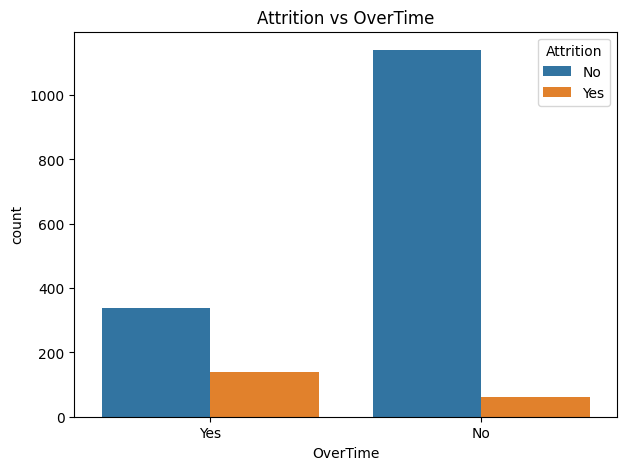

In [24]:
# prompt 13
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title("Attrition vs OverTime")
plt.show()


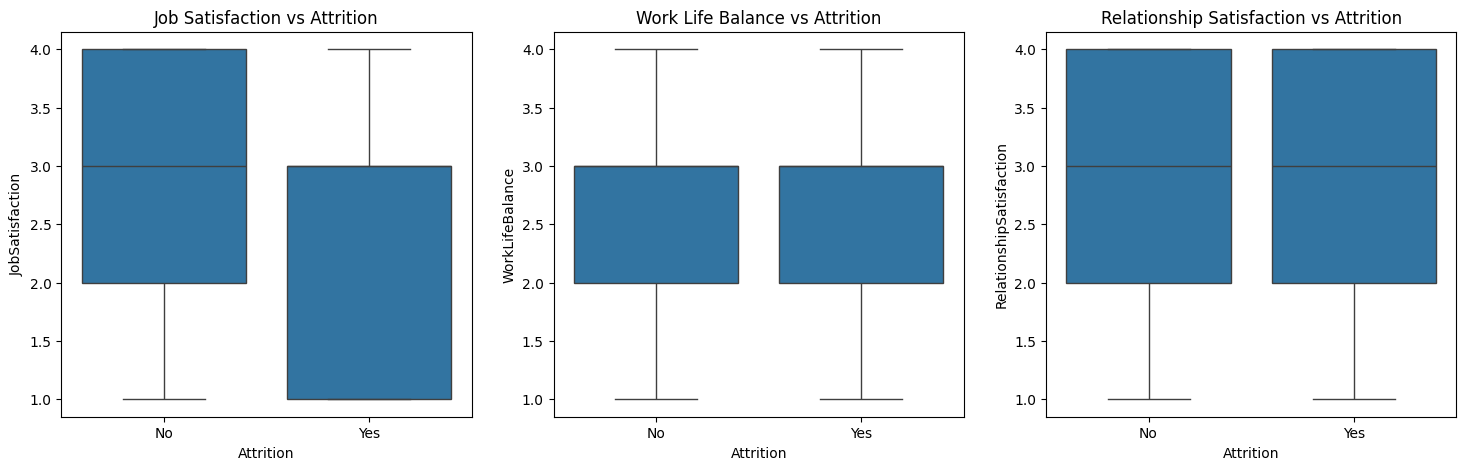

In [25]:
# prompt 14
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', ax=axes[0])
axes[0].set_title("Job Satisfaction vs Attrition")

sns.boxplot(data=df, x='Attrition', y='WorkLifeBalance', ax=axes[1])
axes[1].set_title("Work Life Balance vs Attrition")

sns.boxplot(data=df, x='Attrition', y='RelationshipSatisfaction', ax=axes[2])
axes[2].set_title("Relationship Satisfaction vs Attrition")

plt.show()


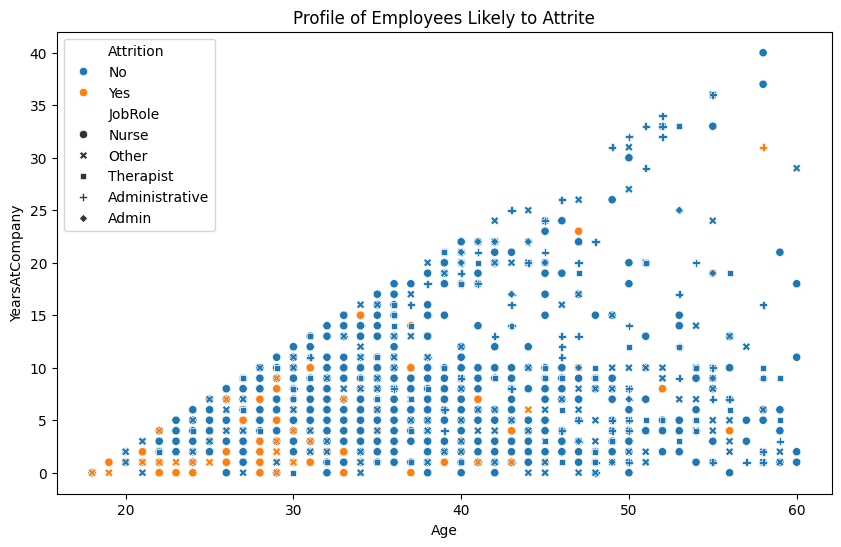

In [26]:
# prompt 15
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='YearsAtCompany', hue='Attrition', style='JobRole')
plt.title("Profile of Employees Likely to Attrite")
plt.show()


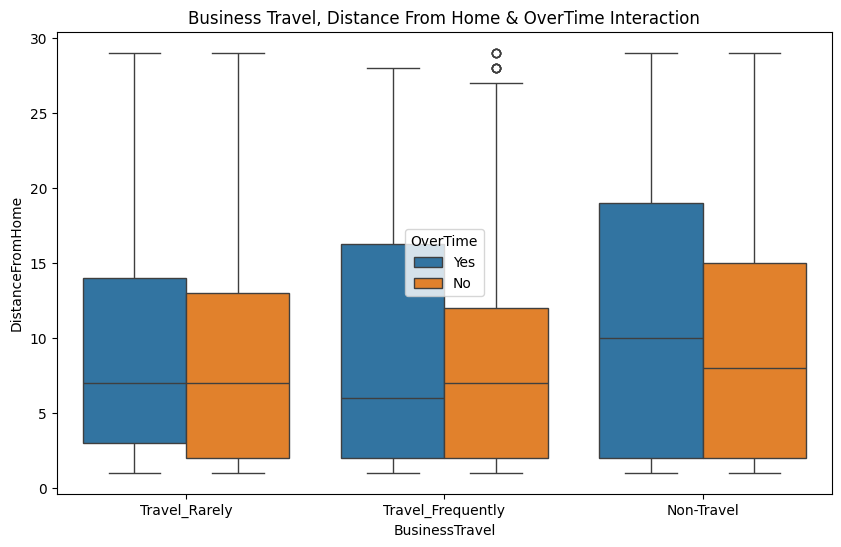

In [27]:
# prompt 16
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="BusinessTravel", y="DistanceFromHome", hue="OverTime")
plt.title("Business Travel, Distance From Home & OverTime Interaction")
plt.show()


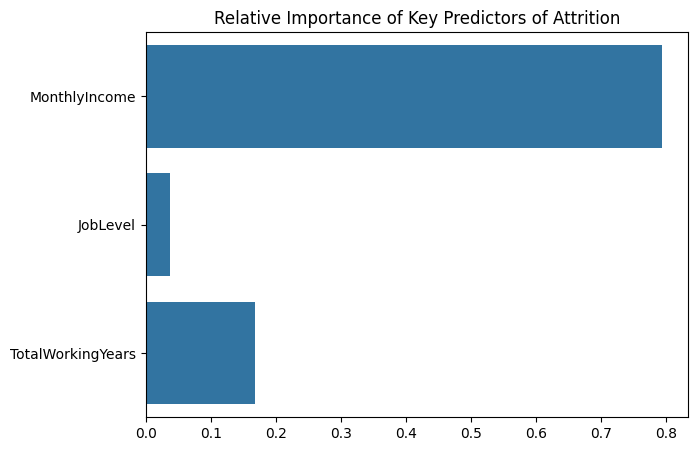

In [28]:
# prompt 17
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare data
df_model = df.copy()
df_model = df_model.select_dtypes(include=['int64','float64','object'])

# Encode target
le = LabelEncoder()
df_model['Attrition'] = le.fit_transform(df_model['Attrition'])

# Select features
features = ['MonthlyIncome','JobLevel','TotalWorkingYears']
X = df_model[features]
y = df_model['Attrition']

# Train model
rf = RandomForestClassifier()
rf.fit(X, y)

# Plot importance
importances = rf.feature_importances_

plt.figure(figsize=(7,5))
sns.barplot(x=importances, y=features)
plt.title("Relative Importance of Key Predictors of Attrition")
plt.show()


# prompt 18
Final Business Insights (Bullet Points)

Younger employees with fewer years at the company show the highest attrition, indicating challenges in early retention.

OverTime is a major driver of attrition. Employees who frequently work overtime resign at significantly higher rates.

Low MonthlyIncome strongly correlates with attrition, especially among mid-level employees, highlighting potential concerns about pay competitiveness.

Employees who travel frequently or live far from the office are more likely to leave, especially when combined with demanding schedules.

Job satisfaction, relationship satisfaction, and work-life balance collectively play a major role—low scores across these factors sharply increase attrition risk.

In [29]:
# TASK 2

In [30]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.6 MB/s eta 0:00:00
